# NMF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

### Data

In [2]:
import pickle
with open('data/df_inicial.pickle', 'rb') as f:
    df = pickle.load(f)

In [3]:
df

,Climbing,Fitness,Football,Paddle,Running,Surf,Trecking,Voley,Bookstores,Concerts,...,Burgers,Chinese,Indian,Italian,Mediterranean,Sushi,Coffee,Drinks at night,Parties,Sunsets
0,1,0,0,0,1,1,0,0,1,1,...,0,0,0,1,1,1,1,1,1,0
1,1,1,1,0,0,0,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1
2,0,1,1,0,1,0,0,0,1,0,...,1,1,0,1,1,0,0,0,0,1
3,0,0,0,1,0,0,1,0,0,1,...,1,0,0,1,1,1,1,1,1,1
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
111,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,1,0
112,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
113,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1


#### app json column names 

In [30]:
col_names = {'Climbing': 'climbing', 'Fitness': 'fitness', 'Football': 'football', 'Paddle': 'paddle',
             'Running': 'running', 'Surf': 'surf', 'Trecking': 'trecking', 'Voley': 'volley',
             'Bookstores': 'bookstores', 'Concerts': 'concerts', 'Guided visits': 'guidedVisits',
             'Movies': 'movies', 'Museums': 'museums', 'Parks': 'parks', 'Rural tourism': 'ruralTourism',
             'Theaters': 'theaters', 'Burgers': 'burguers', 'Chinese': 'chinese', 'Indian': 'indian',
             'Italian': 'italian', 'Mediterranean': 'mediterranean', 'Sushi': 'sushi', 'Coffee': 'coffee',
             'Drinks at night': 'drinks', 'Parties': 'parties', 'Sunsets': 'sunsets'}

In [32]:
df_ohe = df.rename(columns=col_names)

## NMF Model

In [4]:
from sklearn.decomposition import NMF

# Initializing NMF instance with 4 components
nmf = NMF(n_components=4, random_state=42)

# Fitting the model
nmf.fit(df)

# Extracting the components 
components = pd.DataFrame(data=nmf.components_, columns=df.columns)

### NMF components

In [5]:
components

,Climbing,Fitness,Football,Paddle,Running,Surf,Trecking,Voley,Bookstores,Concerts,...,Burgers,Chinese,Indian,Italian,Mediterranean,Sushi,Coffee,Drinks at night,Parties,Sunsets
0,0.234761,0.095495,0.509550,0.488297,0.142288,0.080588,0.006931,0.121179,0.109930,0.000000,...,1.506046,1.762445,1.170227,1.294078,0.843612,0.912283,1.267306,0.075429,0.000000,1.122106
1,0.001074,0.128763,0.000000,0.202024,0.319376,0.000000,1.263059,0.187341,0.000000,0.115816,...,0.000000,0.000000,0.000000,0.511590,1.297256,0.376943,0.638521,0.000000,0.000000,1.095664
2,0.000000,0.824639,0.242692,0.025125,0.401167,0.247103,0.018506,0.071540,0.000000,1.737057,...,0.719902,0.000000,0.000000,0.700190,0.352326,0.279851,0.000000,2.205004,1.996175,0.272826
3,0.073271,1.148440,0.000000,0.187705,0.278201,0.263753,0.000000,0.044559,0.807677,0.454684,...,0.000000,0.137457,0.710929,0.780230,0.939247,0.483877,0.747582,0.000000,0.282350,0.000000


### NMF segmentation averages

In [6]:
# Let's extract the features matrix lat_feat (nmf_features) which we will use to extract the segment assignment

lat_feat = pd.DataFrame(data=nmf.transform(df), columns=components.index)
lat_feat.index = df.index

In [14]:
lat_feat

,0,1,2,3
0,0.119979,0.042840,0.406818,0.583776
1,0.555087,0.000000,0.202163,0.004736
2,0.263683,0.464831,0.088828,0.193185
3,0.165538,0.618708,0.443166,0.000000
4,0.049017,0.167889,0.515049,0.077794
...,...,...,...,...
110,0.093821,0.187337,0.000000,0.035971
111,0.010314,0.146043,0.464198,0.000000
112,0.000000,0.493293,0.099368,0.000000
113,0.072110,0.598765,0.000000,0.370800


In [7]:
# Assigning the column name where the corresponding value is the largest
df_nmf4 = df.assign(segment = lat_feat.idxmax(axis=1))

In [8]:
# Average column values per each segment
nmf4_averages = df_nmf4.groupby('segment').mean()

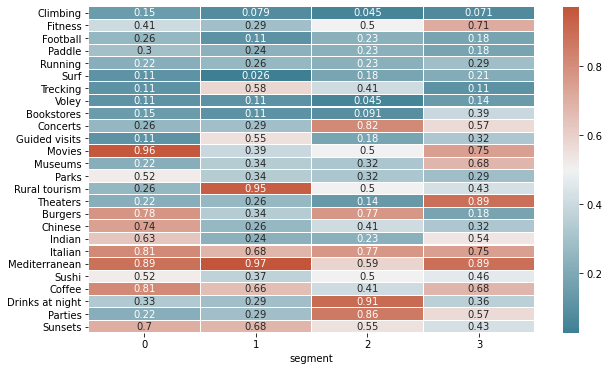

In [10]:
# Plotting the average values per each segment as heatmap
cmaps = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(10,6)) 
sns.heatmap(nmf4_averages.T, cmap=cmaps, linewidths=0.1, annot=True)

plt.show()

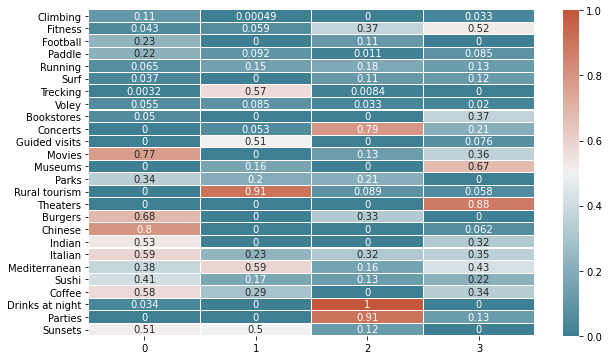

In [17]:
# Plotting the components values as heatmap
cmaps = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(10,6)) 
sns.heatmap((components/2.2).T, cmap=cmaps, linewidths=0.1, annot=True)

plt.show()

### Predictions

In [27]:
nmf.transform([[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]])

array([[0.26065091, 0.35089328, 0.19279057, 0.        ]])

In [40]:
nmf.transform([[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]]).argmax()

1

In [29]:
nmf.transform([[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]]).argmax()

1

In [41]:
nmf.transform([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).argmax()

0

In [42]:
nmf.transform([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]).argmax()

3

In [38]:
print(df_nmf4.iloc[0,:].tolist())

[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3]


In [39]:
nmf.transform([[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]]).argmax()

3

### Reconstruction error
Frobenius norm of the matrix difference, or beta-divergence, between the training data X and the reconstructed data WH from the fitted model.

In [21]:
nmf.reconstruction_err_

20.128308346947147

### Serialization

In [35]:
import joblib
# Save model as pickle file
joblib.dump(nmf, "model.pkl")

['model.pkl']